In [1]:
import sys
sys.path.append('../..')
from dataloader import *
from model import *
from train_eval_test import *
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt
import pandas as pd

2024-01-23 14:34:37.682063: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-23 14:34:39.372645: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-23 14:34:43.108532: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.6/lib64:/usr/local/cuda-12.2/lib64
2024-01-23 14:34:43.109863: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror:

## Load data

In [2]:
torch.manual_seed(0)

In [3]:
ecl_data = pd.read_csv('../../data/electricity.csv', header=None).to_numpy()

In [4]:
batch_size = 32
n_train = 18317
n_eval = 2633
n_test = 5261
train_loader, eval_loader, test_loader = get_loaders(ecl_data, batch_size, n_train, n_eval, n_test, T=96, S=96)

## Train

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
writer = SummaryWriter()

cuda


In [6]:
N = 321 
T = 96 
D = 512
S = 96  
hidden_dim = 512
num_blocks = 2 

itransformer = iTransformer(N, T, D, S, hidden_dim, num_blocks).to(device)
optimizer = torch.optim.Adam(itransformer.parameters(), lr=1e-3, weight_decay = 1e-5) 



In [ ]:
loss_values, loss_eval = train(itransformer, optimizer, train_loader, eval_loader, 10, device, writer)

## Test

In [8]:
loss_test, loss_mae, target, yhat = test(itransformer, test_loader, device)
print("MSE : ", loss_test)
print("MAE : ", loss_mae)

MSE :  0.15566444767158735
MAE :  0.2583766516836934


Affichage pour une modalité sur toute la durée de la prédiction

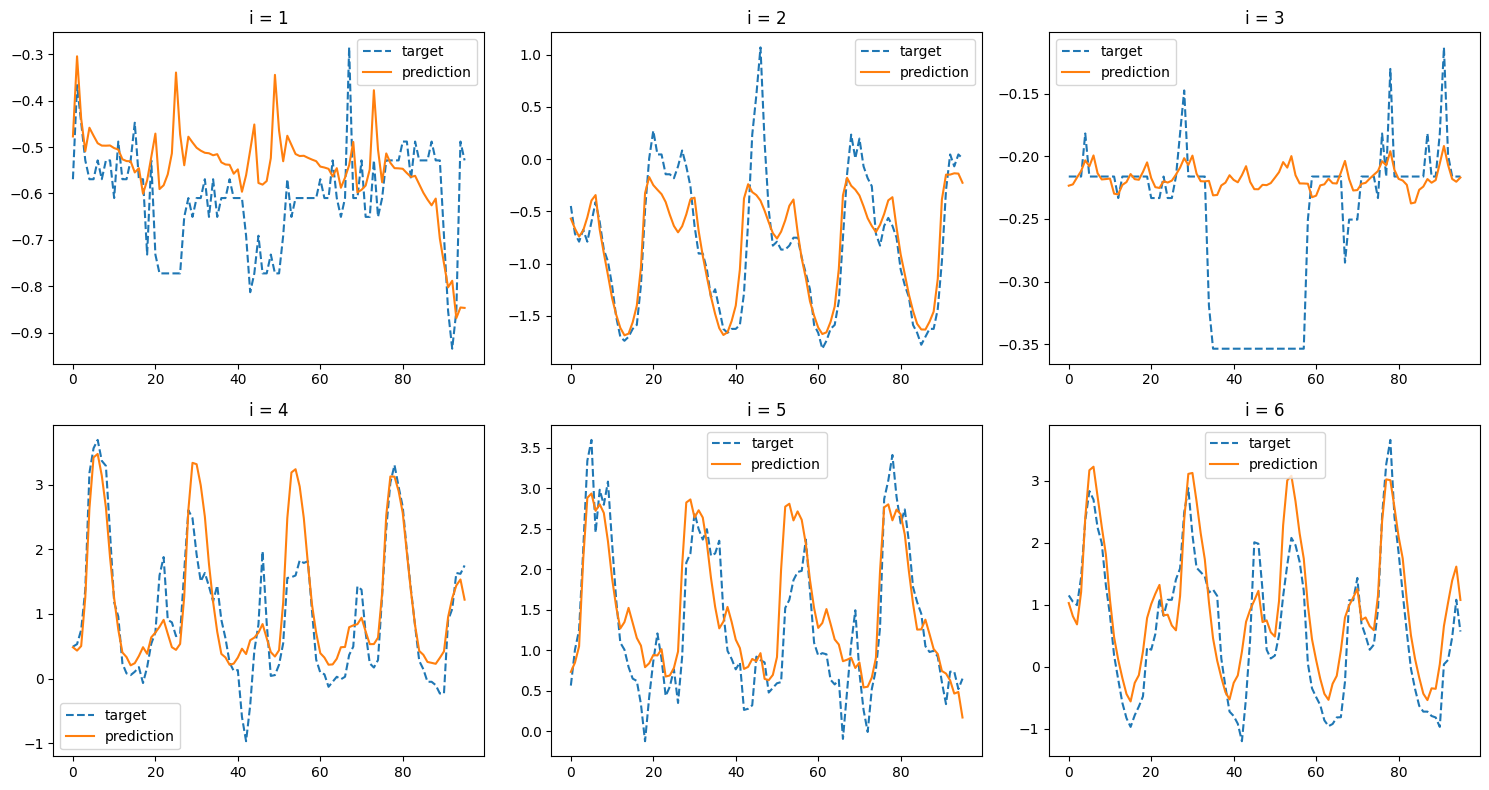

In [12]:
plt.figure(figsize=(15, 8))

for i in range(6):
    plt.subplot(2, 3, i+1)
    
    plt.plot(target[0, :, i].cpu(), "--", label="target")
    plt.plot(yhat[0, :, i].cpu(), label="prediction")
    
    plt.title(f"i = {i+1}")
    plt.legend()

plt.tight_layout()
plt.show()

Affichage de toutes les modalités à un instant t

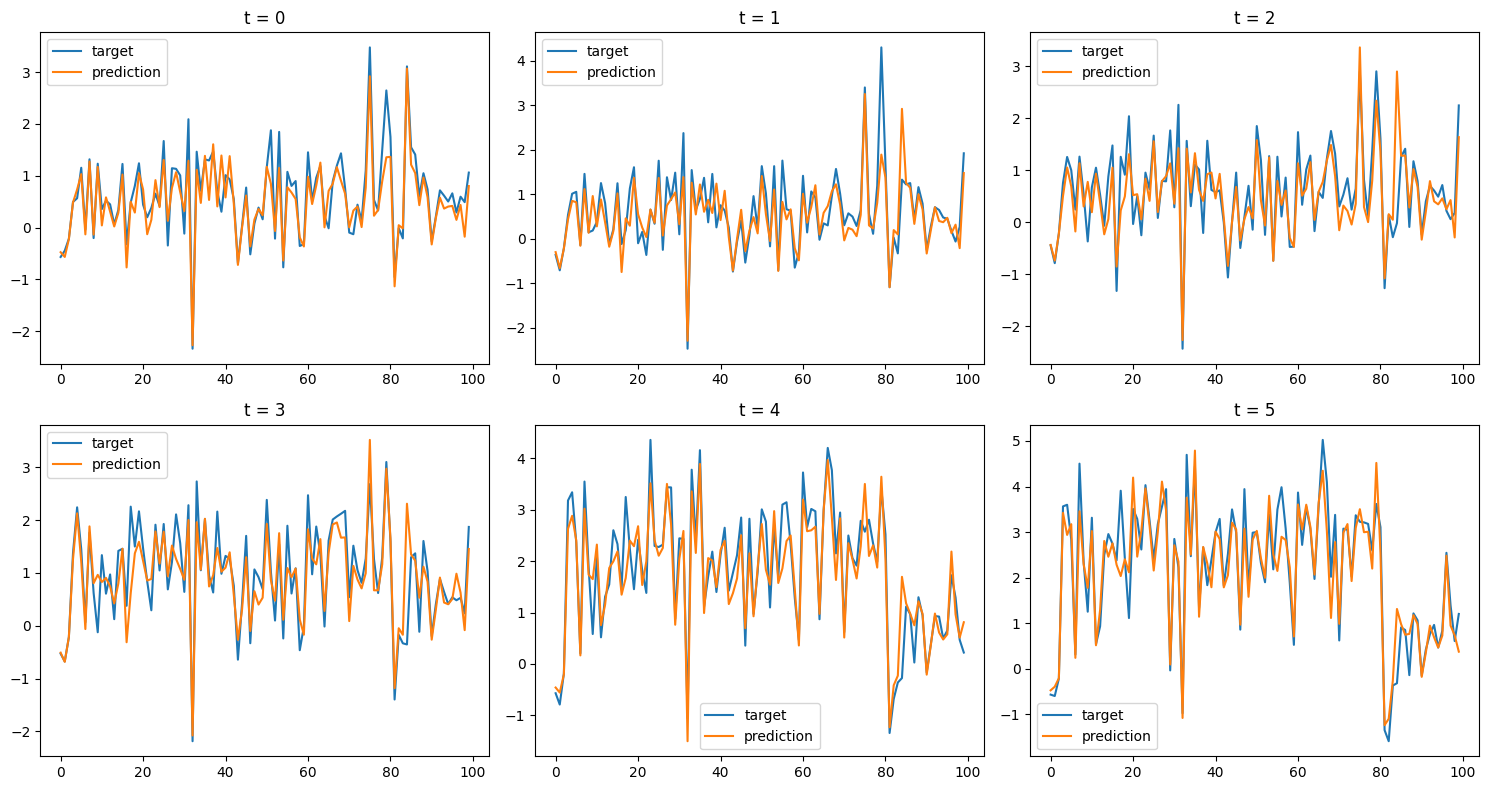

In [16]:
plt.figure(figsize=(15, 8))

for i in range(1, 7):
    plt.subplot(2, 3, i)
    
    current_i = i-1
    
    plt.plot(np.arange(len(target[1, current_i, :100])), target[0, current_i, :100].cpu(),  label="target")
    plt.plot(np.arange(len(target[1, current_i, :100])), yhat[0, current_i, :100].cpu(),  label="prediction")


    plt.title(f"t = {current_i}")
    plt.legend()

plt.tight_layout()
plt.show()